In [1]:
import mesaPlot as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [8]:
home = "C:\\Users\\KNL\\Documents\\UvA\\Stellar Structure and Evolution\\MESA assignment\\Question 2\\"
def file_loc(ext):
    '''Find the location of the data files
    from the home folder return the history.data file

    input:
    ext: str folder where history.data file is located
    variables:
    file_loc: str file path
    data.loadHistory: list load the data form file_loc

    return 
    data
    '''
    file_loc = home + ext
    data = mp.MESA()
    data.loadHistory(f=file_loc)
    return data

#grab all the data from files for each star
M1sol = 'LOGS_1solMass'
M3sol = 'LOGS_3solMass'
M5sol = 'LOGS_5solMass'
M9sol = 'LOGS_9solMass'
M12sol = 'LOGS_12solMass'
data_M1sol = file_loc(M1sol)
data_M3sol = file_loc(M3sol)
data_M5sol = file_loc(M5sol)
data_M9sol = file_loc(M9sol)
data_M12sol = file_loc(M12sol)

# syarief = "syarief_LOGS"
# syarief_data = file_loc(syarief)
def get_data(datfile):
    '''Extract the data you want to a pandas DataFrame'''

    wanted_columns = ["log_Teff", "log_L","center_h1",'log_Lnuc']

    wanted_data = np.array([datfile.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
    df_star = pd.DataFrame(wanted_data, columns = wanted_columns)
    Teff = df_star["log_Teff"]
    Lum = df_star["log_L"]
    center_h1 = df_star["center_h1"]
    lnuc = df_star['log_Lnuc']
    return Teff, Lum, center_h1, lnuc
Teff1, Lum1, h1_1, lnuc_1  = get_data(data_M1sol)
#FIX FIX FIX

Teff3, Lum3, h1_3, lnuc3 = get_data(data_M3sol)
Teff5, Lum5, h1_5, lnuc5 = get_data(data_M5sol)
Teff9, Lum9, h1_9, lnuc9 = get_data(data_M9sol)
Teff12, Lum12, h1_12, lnuc12 = get_data(data_M12sol)

0
1
2
3
4


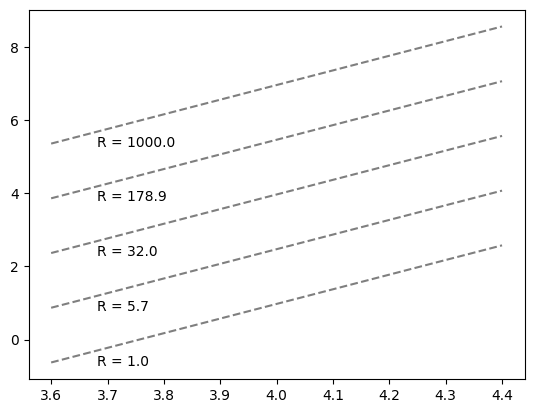

In [10]:
R = np.logspace(0.01, 3, 5)
T_arr = np.logspace(3.6, 4.4, 100)
for i in range(len(R)):
    print(i)
    sigma = 5.6704e-5 # cgs
    L = 4*np.pi * sigma *(R[i]*6.9599e10)**2 * T_arr**4
    L_sun = 3.846e33  # cgs
    plt.plot(np.log10(T_arr), np.log10(L/L_sun), color='k', alpha=0.5, linestyle='--',)# label=i) # annotate
    # Annotate the lines with the corresponding R values
    plt.text(np.log10(T_arr[10]), np.log10(L[1] / L_sun), f'R = {float(R[i]):.1f}', ha='left', va='center', fontsize=10, color='k')


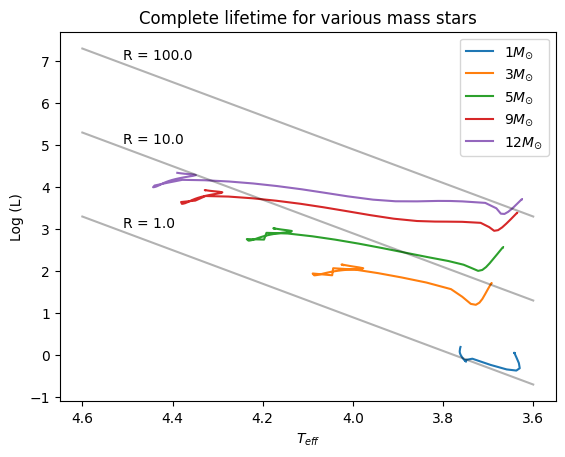

In [33]:
Mass= '$M_{\odot}$'
def star1(Teff, Lum, index):
    return Teff[index:], Lum[index:]
#Teff1, Lum1 = star1(Teff1, Lum1, 8)
plt.plot(Teff1, Lum1, label="1"+Mass)
plt.plot(Teff3, Lum3, label='3'+Mass)
plt.plot(Teff5, Lum5, label='5'+Mass)
plt.plot(Teff9, Lum9, label='9'+Mass)
plt.plot(Teff12, Lum12, label='12'+Mass)


R = np.logspace(0, 2, 3)
Temp_arr = np.logspace(3.6, 4.6, 100)
Rsun = 6.95*(10**10)
for i in range(len(R)):
    stefan = 5*(10**-5) # ergs/(cm**2 * K*4)
    L = 4*np.pi * stefan *(R[i]*Rsun)**2 * T_arr**4
    L_sun = 3.8*(10**33) # cgs
    plt.plot(np.log10(T_arr), np.log10(L/L_sun), color='k', alpha=0.3, linestyle='-',)# label=i) # annotate
    # Annotate the lines with the corresponding R values
    plt.text(np.log10(T_arr[90]), np.log10(L[99] / L_sun), f'R = {float(R[i]):.1f}', ha='left', va='top', fontsize=10, color='k')

plt.xlabel("$T_{eff}$")
plt.ylabel("Log (L)")
plt.gca().invert_xaxis()
plt.title("Complete lifetime for various mass stars")
plt.savefig("Question 2A")
plt.legend()
plt.show()

In [44]:
def only_ms(h1, teff, lum, lnuc):
    '''Find the indicies where lunc is greater than zero drops; assume it's the main sequence entry'''
    index = np.where([lnuc >= 0.99])
    #return 
    teff = teff[index[1]]
    lum = lum[index[1]]
    lnuc = lnuc[index[1]]
    h1 = h1[index[1]]
    return teff, lum , h1, lnuc
    # If no match is found, return the original lists
    #return teff, lum, h1
#Teff1, Lum1, h1_1, Lnuc1 = only_ms(h1_1, Teff1, Lum3, lnuc3)
Teff3, Lum3, h1_3, Lnuc3 = only_ms(h1_3, Teff3, Lum3, lnuc3)
Teff5, Lum5, h1_5, Lnuc5 = only_ms(h1_5, Teff5, Lum5, lnuc5)
Teff9, Lum9, h1_9, Lnuc9 = only_ms(h1_9, Teff9, Lum9, lnuc9)
Teff12, Lum12, h1_12, Lnuc12 = only_ms(h1_12, Teff12, Lum12, lnuc12)
print(h1_1)

0     0.700000
1     0.700000
2     0.700000
3     0.700000
4     0.700000
5     0.700000
6     0.700000
7     0.700000
8     0.700000
9     0.700000
10    0.700000
11    0.700000
12    0.700000
13    0.700000
14    0.700000
15    0.700000
16    0.700000
17    0.700000
18    0.700000
19    0.700000
20    0.700000
21    0.700000
22    0.700000
23    0.700000
24    0.700000
25    0.700000
26    0.700000
27    0.700000
28    0.700000
29    0.699999
30    0.699994
31    0.699969
32    0.699845
33    0.699411
34    0.697883
35    0.693779
36    0.682194
37    0.652084
38    0.597662
39    0.546934
40    0.496364
41    0.445701
42    0.394918
43    0.344004
44    0.292977
45    0.241849
46    0.190529
47    0.139003
48    0.087538
49    0.043964
50    0.022262
51    0.011883
52    0.006475
53    0.003556
54    0.001958
55    0.001079
56    0.000594
57    0.000327
58    0.000180
59    0.000099
Name: center_h1, dtype: float64


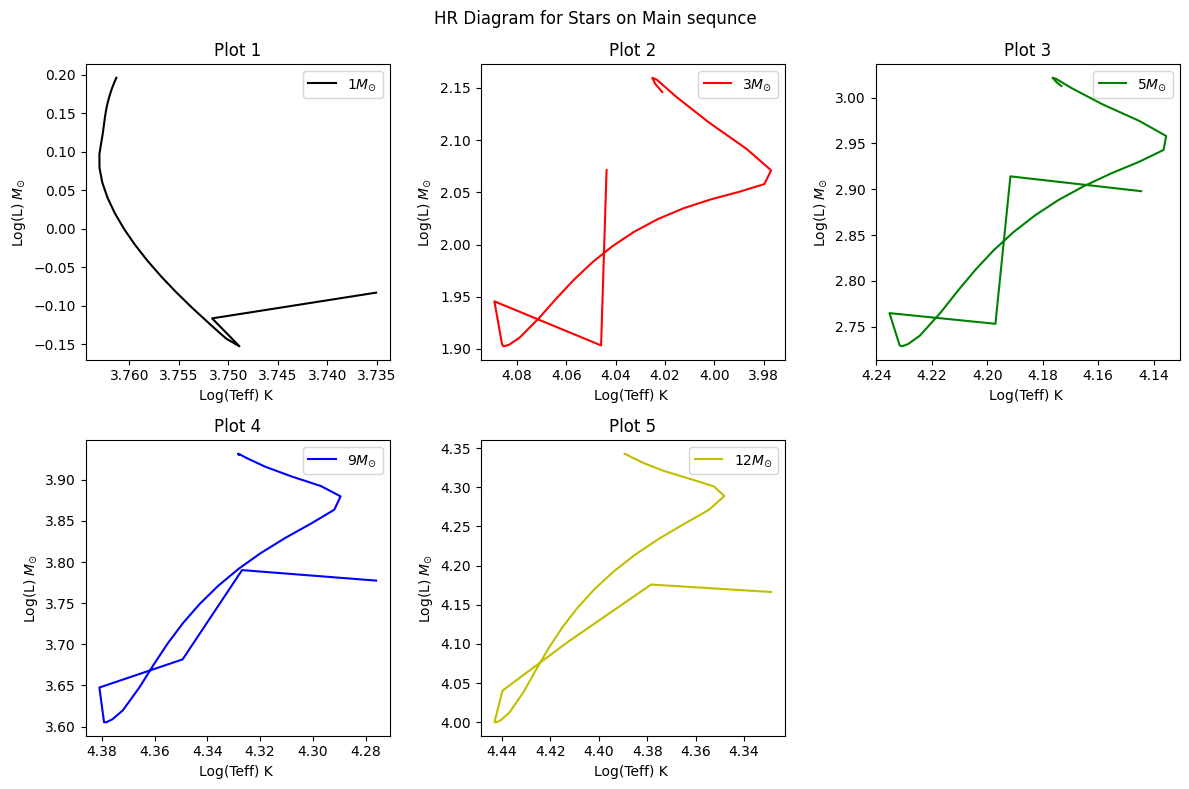

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("HR Diagram for Stars on Main sequnce")
xaxis = "Log(Teff) K "
yaxis = "Log(L) $M_{\odot}$"
index = 32
Teff1_new, Lum1_new = Teff1[index:], Lum1[index:]
axs[0, 0].plot(Teff1_new, Lum1_new, color='k', label="1"+Mass)
axs[0, 0].set_title('Plot 1')
axs[0, 0].set_xlabel(xaxis)
axs[0, 0].set_ylabel(yaxis)
axs[0, 0].invert_xaxis()
axs[0, 0].legend()

axs[0, 1].plot(Teff3, Lum3, color='r' ,label="3"+Mass)
axs[0, 1].set_title('Plot 2')
axs[0, 1].set_xlabel(xaxis)
axs[0, 1].set_ylabel(yaxis)
axs[0, 1].invert_xaxis()
axs[0, 1].legend()

axs[0, 2].plot(Teff5, Lum5, color='g', label="5"+Mass)
axs[0, 2].set_title('Plot 3')
axs[0, 2].set_xlabel(xaxis)
axs[0, 2].set_ylabel(yaxis)
axs[0, 2].invert_xaxis()
axs[0, 2].legend()

axs[1, 0].plot(Teff9, Lum9, color='b', label="9"+Mass)
axs[1, 0].set_title('Plot 4')
axs[1, 0].set_xlabel(xaxis)
axs[1, 0].set_ylabel(yaxis)
axs[1, 0].invert_xaxis()
axs[1, 0].legend()

axs[1, 1].plot(Teff12, Lum12, color='y', label="12"+Mass)
axs[1, 1].set_title('Plot 5')
axs[1, 1].set_xlabel(xaxis)
axs[1, 1].set_ylabel(yaxis)
axs[1, 1].invert_xaxis()
axs[1, 1].legend()

fig.delaxes(axs[1, 2])

# You can adjust the layout to prevent overlapping
plt.tight_layout()
# Show the plots
plt.savefig('MS_plot.png')
plt.show()

C:\Users\KNL\Documents\UvA\Stellar Structure and Evolution\MESA assignment\Question 2\
Hydrgen burning, end of hook
look at L nuclear burning

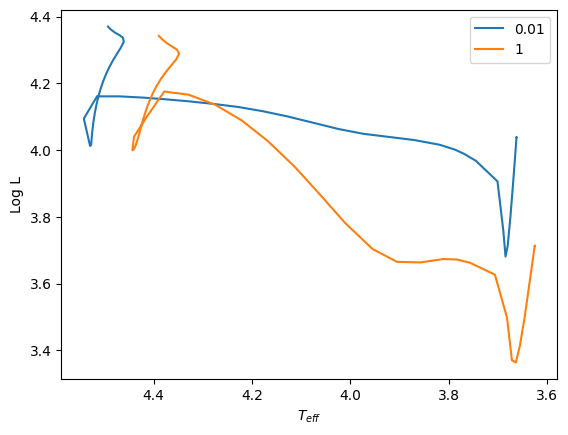

In [37]:
#Metalicity Question
M12_z = "LOGS_12_solMass_Z001"
data_z = file_loc(M12_z)
#get data 
TeffZ, LumZ, h1_z, lnuc_z = get_data(data_z)
plt.plot(TeffZ, LumZ, label  = '0.01')#'$\frac{Z}{Z_{\odot}} = 0.01$')
plt.plot(Teff12, Lum12, label ='1')
plt.xlabel("$T_{eff}$")
plt.ylabel("Log L")
plt.gca().invert_xaxis()
plt.legend()
plt.show()